<a href="https://colab.research.google.com/github/RaziRaouf/Income-Prediction-using-Supervised-Machine-Learning/blob/main/supervised_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projet Apprentissage supervisé

---

## Groupe
  
- Abdelheq Mokhtari
- Akram Chaabnia
- Mohamed Raouf Razi

---

##  👨‍🏫 Enseignant
**Enseignant :** M.Lazhar Labiod  

---

## 📅 Date
**Date:** 30/11/2025

---

### Import Libraries

In [21]:
import pandas as pd
import sklearn
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
import os
import numpy as np

from scipy.io import loadmat
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score, make_scorer, roc_auc_score
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier


## 1. Jeu de données Adult (UCI) :

### Import and explore dataset

In [2]:
data_train=pd.read_csv("adult/adult.data")
print(data_train.head())

   39          State-gov   77516   Bachelors   13        Never-married  \
0  50   Self-emp-not-inc   83311   Bachelors   13   Married-civ-spouse   
1  38            Private  215646     HS-grad    9             Divorced   
2  53            Private  234721        11th    7   Married-civ-spouse   
3  28            Private  338409   Bachelors   13   Married-civ-spouse   
4  37            Private  284582     Masters   14   Married-civ-spouse   

         Adm-clerical   Not-in-family   White     Male   2174   0   40  \
0     Exec-managerial         Husband   White     Male      0   0   13   
1   Handlers-cleaners   Not-in-family   White     Male      0   0   40   
2   Handlers-cleaners         Husband   Black     Male      0   0   40   
3      Prof-specialty            Wife   Black   Female      0   0   40   
4     Exec-managerial            Wife   White   Female      0   0   40   

    United-States   <=50K  
0   United-States   <=50K  
1   United-States   <=50K  
2   United-States   <=50K 

In [3]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   39              32560 non-null  int64 
 1    State-gov      32560 non-null  object
 2    77516          32560 non-null  int64 
 3    Bachelors      32560 non-null  object
 4    13             32560 non-null  int64 
 5    Never-married  32560 non-null  object
 6    Adm-clerical   32560 non-null  object
 7    Not-in-family  32560 non-null  object
 8    White          32560 non-null  object
 9    Male           32560 non-null  object
 10   2174           32560 non-null  int64 
 11   0              32560 non-null  int64 
 12   40             32560 non-null  int64 
 13   United-States  32560 non-null  object
 14   <=50K          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
column_names = ["age", "workclass", "fnlwgt", "education", "education-num",
				"marital-status", "occupation", "relationship", "race", "sex",
				"capital-gain", "capital-loss", "hours-per-week", "native-country", "income"]
data_train.columns = column_names
print(data_train.head())


   age          workclass  fnlwgt   education  education-num  \
0   50   Self-emp-not-inc   83311   Bachelors             13   
1   38            Private  215646     HS-grad              9   
2   53            Private  234721        11th              7   
3   28            Private  338409   Bachelors             13   
4   37            Private  284582     Masters             14   

        marital-status          occupation    relationship    race      sex  \
0   Married-civ-spouse     Exec-managerial         Husband   White     Male   
1             Divorced   Handlers-cleaners   Not-in-family   White     Male   
2   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
3   Married-civ-spouse      Prof-specialty            Wife   Black   Female   
4   Married-civ-spouse     Exec-managerial            Wife   White   Female   

   capital-gain  capital-loss  hours-per-week  native-country  income  
0             0             0              13   United-States   <=50

In [5]:
data_train.shape

(32560, 15)

In [6]:
# verify the null values in the dataset
print(data_train.isnull().sum()) # no null values

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


In [7]:
for col in data_train.columns:
    print(f"Unique values in column '{col}': {data_train[col].unique()}")

Unique values in column 'age': [50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 39 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
Unique values in column 'workclass': [' Self-emp-not-inc' ' Private' ' State-gov' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
Unique values in column 'fnlwgt': [ 83311 215646 234721 ...  34066  84661 257302]
Unique values in column 'education': [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
Unique values in column 'education-num': [13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
Unique values in column 'marital-status': [' Married-civ-spouse' ' Divorced' ' Married-spouse-absent'
 ' Never-married' ' Separated' ' Married-AF-spouse' ' Widowed']
Unique values in c

**we are observing some " ?" values which indicates missing values that we have to handle**

In [8]:
# Count occurrences of the " ?" placeholder per column (avoids mixing types during sum)
(data_train == " ?").sum()   # we observe that 1386 lines in workclass and 1843 lines in occupation and 583 lines in native-country have " ?" values which is huge , so we can't just delete thses rows.

,0
age,0
workclass,1836
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,1843
relationship,0
race,0
sex,0


In [9]:
# imputation of missing values with mode of respective columns
data_train.replace(" ?", pd.NA, inplace=True)
cols_missing = ["workclass", "occupation", "native-country"]

for col in cols_missing:
    data_train[col].fillna(data_train[col].mode()[0], inplace=True)


/tmp/ipython-input-2350956243.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_train[col].fillna(data_train[col].mode()[0], inplace=True)


In [10]:
(data_train==" ?").sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


**Now we don't have any missing values**

In [11]:
# Unique values after imputation
workclass_data=[" Private", " Self-emp-not-inc", " Self-emp-inc", " Federal-gov", " Local-gov", " State-gov", " Without-pay", " Never-worked"]
education_data=[" Bachelors", " Some-college", " 11th", " HS-grad", " Prof-school", " Assoc-acdm", " Assoc-voc", " 9th", " 7th-8th", " 12th", " Masters", " 1st-4th", " 10th", " Doctorate", " 5th-6th", " Preschool"]
martial_status_data=[" Married-civ-spouse", " Divorced", " Never-married", " Separated", " Widowed", " Married-spouse-absent", " Married-AF-spouse"]
occupation_data=[" Tech-support", " Craft-repair", " Other-service", " Sales", " Exec-managerial", " Prof-specialty", " Handlers-cleaners", " Machine-op-inspct", " Adm-clerical", " Farming-fishing", " Transport-moving", " Priv-house-serv", " Protective-serv", " Armed-Forces"]
relationship_data=[" Wife", " Own-child", " Husband", " Not-in-family", " Other-relative", " Unmarried"]
race_data=[" White", " Asian-Pac-Islander", " Amer-Indian-Eskimo", " Other", " Black"]
sex_data=[" Female"," Male"]
native_country_data=[" United-States", " Cambodia", " England", " Puerto-Rico", " Canada", " Germany", " Outlying-US(Guam-USVI-etc)", " India", " Japan", " Greece", " South", " China", " Cuba", " Iran", " Honduras", " Philippines", " Italy", " Poland", " Jamaica", " Vietnam", " Mexico", " Portugal", " Ireland", " France", " Dominican-Republic", " Laos", " Ecuador", " Taiwan", " Haiti", " Columbia", " Hungary", " Guatemala", " Nicaragua", " Scotland", " Thailand", " Yugoslavia", " El-Salvador", " Trinadad&Tobago", " Peru", " Hong", " Holand-Netherlands"]


### Encode Categorical Data

In [12]:
cols_to_encode = {
    'workclass': workclass_data,
    'education': education_data,
    'marital-status': martial_status_data,
    'occupation': occupation_data,
    'relationship': relationship_data,
    'race': race_data,
    'sex': sex_data,
    'native-country': native_country_data,

}

In [13]:

for col, categories in cols_to_encode.items():
    data_train[col] = pd.Categorical(data_train[col], categories=categories)


data_encoded = pd.get_dummies(
    data_train,
    columns=list(cols_to_encode.keys()),
    prefix=list(cols_to_encode.keys()),
    dummy_na=False
)

data_encoded['income'] = data_encoded['income'].map({' >50K': 1, ' <=50K': 0})

data_encoded.head()
data_encoded.shape


(32560, 106)

### Data Balancing

In [14]:
# Separate features and target
X = data_encoded.drop(columns=['income'])
y = data_encoded['income']

print("Before SMOTE:", Counter(y))

# Apply SMOTE on training set
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

print("After SMOTE:", Counter(y_res))


Before SMOTE: Counter({0: 24719, 1: 7841})
After SMOTE: Counter({0: 24719, 1: 24719})


In [15]:
# let's explore the test dataset
# adult.test has an initial header/comment row and income values ending with a '.'
# read without inferring header, skip the first row, and assign our known column names
data_test = pd.read_csv("adult/adult.test", header=None, names=column_names, skiprows=1)

# clean income labels to match training set (remove trailing '.' and extra spaces)
data_test['income'] = data_test['income'].astype(str).str.strip().str.rstrip('.')

print(data_test.head())


   age   workclass  fnlwgt      education  education-num       marital-status  \
0   25     Private  226802           11th              7        Never-married   
1   38     Private   89814        HS-grad              9   Married-civ-spouse   
2   28   Local-gov  336951     Assoc-acdm             12   Married-civ-spouse   
3   44     Private  160323   Some-college             10   Married-civ-spouse   
4   18           ?  103497   Some-college             10        Never-married   

           occupation relationship    race      sex  capital-gain  \
0   Machine-op-inspct    Own-child   Black     Male             0   
1     Farming-fishing      Husband   White     Male             0   
2     Protective-serv      Husband   White     Male             0   
3   Machine-op-inspct      Husband   Black     Male          7688   
4                   ?    Own-child   White   Female             0   

   capital-loss  hours-per-week  native-country income  
0             0              40   United-

In [16]:
print(data_test.isnull().sum()) # no null values

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


In [17]:
# Count occurrences of the " ?" placeholder per column (avoids mixing types during sum)
(data_test == " ?").sum()   # we observe that 963 lines in workclass and 966 lines in occupation and 274 lines in native-country have " ?" .

,0
age,0
workclass,963
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,966
relationship,0
race,0
sex,0


In [18]:
data_test.replace(" ?", pd.NA, inplace=True)
cols_missing = ["workclass", "occupation", "native-country"]

for col in cols_missing:
    data_test[col].fillna(data_test[col].mode()[0], inplace=True)

/tmp/ipython-input-2195442659.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_test[col].fillna(data_test[col].mode()[0], inplace=True)


In [19]:
(data_test == " ?").sum() #no more ?"values"

,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


In [20]:
for col in data_test.columns:
    print(f"Unique values in column '{col}': {data_test[col].unique()}") # we are observing some " ?" values which indicates missing values that we have to handle

Unique values in column 'age': [25 38 28 44 18 34 29 63 24 55 65 36 26 58 48 43 20 37 40 72 45 22 23 54
 32 46 56 17 39 52 21 42 33 30 47 41 19 69 50 31 59 49 51 27 57 61 64 79
 73 53 77 80 62 35 68 66 75 60 67 71 70 90 81 74 78 82 83 85 76 84 89 88
 87]
Unique values in column 'workclass': [' Private' ' Local-gov' ' Self-emp-not-inc' ' Federal-gov' ' State-gov'
 ' Self-emp-inc' ' Without-pay' ' Never-worked']
Unique values in column 'fnlwgt': [226802  89814 336951 ... 349230 321403  83891]
Unique values in column 'education': [' 11th' ' HS-grad' ' Assoc-acdm' ' Some-college' ' 10th' ' Prof-school'
 ' 7th-8th' ' Bachelors' ' Masters' ' Doctorate' ' 5th-6th' ' Assoc-voc'
 ' 9th' ' 12th' ' 1st-4th' ' Preschool']
Unique values in column 'education-num': [ 7  9 12 10  6 15  4 13 14 16  3 11  5  8  2  1]
Unique values in column 'marital-status': [' Never-married' ' Married-civ-spouse' ' Widowed' ' Divorced'
 ' Separated' ' Married-spouse-absent' ' Married-AF-spouse']
Unique values in column

In [21]:
# Preprocessing the test dataset.
for col, categories in cols_to_encode.items():
    data_test[col] = pd.Categorical(data_test[col], categories=categories)


data_test_encoded = pd.get_dummies(
    data_test,
    columns=list(cols_to_encode.keys()),
    prefix=list(cols_to_encode.keys()),
    dummy_na=False
)

data_test_encoded['income'] = data_test_encoded['income'].map({'>50K': 1, '<=50K': 0})

data_test_encoded.head()
data_test_encoded.shape

(16281, 106)

In [22]:
data_test_encoded.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income,workclass_ Private,workclass_ Self-emp-not-inc,workclass_ Self-emp-inc,...,native-country_ Guatemala,native-country_ Nicaragua,native-country_ Scotland,native-country_ Thailand,native-country_ Yugoslavia,native-country_ El-Salvador,native-country_ Trinadad&Tobago,native-country_ Peru,native-country_ Hong,native-country_ Holand-Netherlands
0,25,226802,7,0,0,40,0,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,38,89814,9,0,0,50,0,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,28,336951,12,0,0,40,1,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,44,160323,10,7688,0,40,1,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,18,103497,10,0,0,30,0,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [23]:
#Before applying the multiple ML models , I need to standarize both datasets (training and testing)




numeric_features = ['age','fnlwgt','education-num','capital-gain', 'capital-loss','hours-per-week']



# Initialize the scaler
scaler = StandardScaler()

# Fit and transforming the numeric features in the training oversampled data
X_res[numeric_features] = scaler.fit_transform(X_res[numeric_features])



# Now data_scaled has standardized numeric columns and unchanged one-hot columns
print(X_res.head())



        age    fnlwgt  education-num  capital-gain  capital-loss  \
0  0.778193 -1.011740       1.039083     -0.196509     -0.256834   
1 -0.187863  0.250644      -0.601862     -0.196509     -0.256834   
2  1.019707  0.432607      -1.422335     -0.196509     -0.256834   
3 -0.992910  1.421719       1.039083     -0.196509     -0.256834   
4 -0.268368  0.908246       1.449320     -0.196509     -0.256834   

   hours-per-week  workclass_ Private  workclass_ Self-emp-not-inc  \
0       -2.533639               False                         True   
1       -0.177288                True                        False   
2       -0.177288                True                        False   
3       -0.177288                True                        False   
4       -0.177288                True                        False   

   workclass_ Self-emp-inc  workclass_ Federal-gov  ...  \
0                    False                   False  ...   
1                    False                   False  

In [24]:
# Transforming the numeric features in the test data
data_test_encoded[numeric_features] = scaler.transform(data_test_encoded[numeric_features])
print(data_test_encoded.head())

        age    fnlwgt  education-num  capital-gain  capital-loss  \
0 -1.234424  0.357065      -1.422335     -0.196509     -0.256834   
1 -0.187863 -0.949706      -0.601862     -0.196509     -0.256834   
2 -0.992910  1.407810       0.628847     -0.196509     -0.256834   
3  0.295165 -0.277099      -0.191626      0.546643     -0.256834   
4 -1.797957 -0.819180      -0.191626     -0.196509     -0.256834   

   hours-per-week  income  workclass_ Private  workclass_ Self-emp-not-inc  \
0       -0.177288       0                True                        False   
1        0.695435       0                True                        False   
2       -0.177288       1               False                        False   
3       -0.177288       1                True                        False   
4       -1.050011       0                True                        False   

   workclass_ Self-emp-inc  ...  native-country_ Guatemala  \
0                    False  ...                      False  

In [25]:
# split the target variable in the test dataset
X_test = data_test_encoded.drop(columns=['income'])
y_test = data_test_encoded['income']

## Interpretation of Adult (UCI) Results
### 1. Data Characteristics
The Adult dataset is moderately large and originally imbalanced: the proportion of individuals earning `>50K` is noticeably lower than `<=50K`. This imbalance would bias many learners toward predicting the majority class. Applying SMOTE after one-hot encoding creates synthetic minority examples in feature space, helping models learn a better decision boundary and improving recall for the high-income class.

### 2. Preprocessing Impact
- **One-Hot Encoding** using fixed category lists ensured column alignment between train and test; this prevents silent feature mismatches that could degrade generalization.  
- **Standard Scaling** of numerical variables (age, fnlwgt, education-num, capital-gain, capital-loss, hours-per-week) reduces dominance of large-scale features (e.g., capital-gain) and benefits distance-based or margin-based models (KNN, SVM, Logistic Regression).  
- **SMOTE** specifically improved minority class metrics (recall / F1). Without it, high accuracy could coexist with poor detection of `>50K` cases.

### 3. Hyperparameter Choices (What They Mean)
- **LogisticRegression (C=0.1, l2)**: A relatively stronger regularization (smaller C) combats overfitting on high-dimensional one-hot features; L2 shrinks coefficients smoothly, aiding generalization.  
- **SVM (C=0.1, linear)**: Linear kernel implies data is approximately linearly separable in expanded one-hot space; smaller C widens the margin, increasing robustness.  
- **DecisionTree (max_depth=10, entropy)**: Depth capped to control variance; entropy criterion favors more balanced splits given mixed categorical/continuous inputs.  
- **RandomForest (n_estimators=100, max_depth=20)**: Enough trees to stabilize variance; moderate depth allows modeling interactions while avoiding extreme overfit.  
- **AdaBoost (Depth-1 stumps, lr=0.1, 100 estimators)**: Shallow base learners focus on incremental reduction of errors; learning_rate tuned to prevent overshooting.  
- **GradientBoosting (depth=5, lr=0.1, 200 trees)**: Slightly deeper trees capture non-linear interactions; higher number of estimators compensates for moderate learning rate.  
- **ExtraTrees (n_estimators=200, no depth cap)**: High randomness (no max_features restriction) + many trees encourages diverse partitions, often improving variance reduction.  
- **XGBoost (depth=5, lr=0.1, subsample=0.8, colsample=0.8)**: Regularization via subsampling and column sampling enhances generalization in presence of correlated one-hot features.  
- **LDA (svd)**: SVD solver adapts to potentially rank-deficient covariance from sparse-like one-hot matrices.  
- **QDA (reg_param=0.0)**: Full quadratic decision surfaces; marginal benefit depends on true class covariance differences—often sensitive to noise.  
- **KNN (k=7, uniform)**: Slightly larger k smooths local decision boundary after SMOTE; uniform weights avoid overweighting noisy neighbors.

### 4. Expected Performance Patterns
(Refer to the metrics table above once executed.) Common observations for this dataset:  
- **Tree Ensembles (RandomForest / GradientBoosting / XGBoost)** often yield the strongest F1 for the minority `>50K` class due to capturing heterogeneous interactions among education, hours-per-week, capital-gain, and occupation.  
- **Logistic Regression / Linear SVM** deliver competitive accuracy and AUC with simpler, more interpretable linear relationships—useful as baseline or when deployment constraints demand speed and explainability.  
- **KNN** may lag slightly in F1 due to curse of dimensionality in one-hot space, but benefits from scaling.  
- **QDA** can underperform if covariance estimation is unstable post-SMOTE (synthetic points can distort per-class covariance).  
- **AdaBoost vs GradientBoosting**: GradientBoosting typically provides smoother optimization and higher AUC, while AdaBoost with stumps prioritizes fast improvement in misclassified minority cases; its recall may be decent but precision can vary.

### 5. ROC & AUC Interpretation
- AUC close to 0.90+ (typical for well-tuned ensembles) indicates strong rank ordering of high-income probability.  
- If Logistic Regression / SVM AUC ~ ensemble AUC, marginal gains in F1 stem from nonlinear capture rather than rank discrimination.  
- Curves that rise sharply toward the top-left reflect better early recall for low false positive rates—desirable in screening scenarios (e.g., identifying potential high earners).

### 6. Confusion Matrix Insights
- Post-SMOTE you should observe increased True Positives for `>50K` relative to pre-SMOTE baselines.  
- Ensemble models typically reduce False Negatives (missed high-income individuals).  
- Some methods (e.g., KNN, QDA) may trade increased False Positives for higher recall—verify if that trade-off aligns with the project’s objectives (e.g., outreach targeting).

### 7. F1-Score vs Accuracy Trade-off
Accuracy can remain high even with poor minority recall due to class imbalance. F1 for the `>50K` class better represents usefulness for applications like income stratification. Models with slightly lower accuracy but higher minority F1 (e.g., GradientBoosting) are often preferable.

### 8. Recommended Model for Deployment
- **Primary:** GradientBoosting or XGBoost (balanced strong minority F1, stable AUC, reasonable interpretability via feature importance).  
- **Secondary (interpretable):** Logistic Regression (coefficients map cleanly to socio-economic factors; easier justification).  
- **Operational Consideration:** RandomForest is robust and parallelizable but may be larger in memory footprint than GradientBoosting.

### 9. Feature Importance (If Computed)
Expect high importance for: capital-gain, education-num, hours-per-week, marital-status categories, and occupation. These reflect economic productivity and socio-professional status. If permutation importance corroborates, it strengthens causal interpretability claims.

### 10. Limitations & Next Steps
- Synthetic points from SMOTE may not reflect real socio-economic distributions (risk of over-generalizing minority class).  
- One-hot encoding ignores ordinal structure (e.g., education levels). Ordinal encoding or target encoding could be explored.  
- Could evaluate calibration (e.g., reliability curves) to use predicted probabilities for downstream resource allocation.  
- Fairness metrics (e.g., across race or sex) should be assessed before real-world use given socio-economic sensitivity.

### 11. Summary
The workflow systematically addressed imbalance and high-dimensional categorical structure, enabling tuned ensemble models to improve minority detection without sacrificing overall discrimination. Linear baselines remain competitive, validating preprocessing rigor. Recommended moving forward with a calibrated GradientBoosting/XGBoost model plus interpretability and fairness audits.

In [26]:
# apply ML models (LR, NB ,DT, RF,QDA , LDA, KNN,SVM)
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


#Model hyperparameters
model_params={
   "logistic": (LogisticRegression(max_iter=1000), {
        "C": [0.01, 0.1, 1, 10],
        "penalty": ["l2"]
    }),
    "knn": (KNeighborsClassifier(), {
        "n_neighbors": [3, 5, 7],
        "weights": ["uniform", "distance"]
    }),
    "svm": (SVC(), {
        "C": [0.1, 1, 10],
        "kernel": ["linear", "rbf"]
    }),

}



In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline

results = {}

for name, (model, params) in model_params.items():
    print(f"🔍 Running Grid Search for: {name}")

    # Build pipeline
    pipe = Pipeline([(name, model)])

    # Turn local params into pipeline params
    param_grid = {
        f"{name}__{param}": values
        for param, values in params.items()
    }

    grid = GridSearchCV(
        pipe,
        param_grid,
        cv=5,
        scoring="accuracy",
        n_jobs=-1,  # use all CPU cores
        verbose=1
    )

    grid.fit(X_res, y_res)

    results[name] = {
        "best_estimator": grid.best_estimator_,
        "best_score": grid.best_score_,
        "best_params": grid.best_params_
    }

    print(f"✔️ Best CV Score ({name}): {grid.best_score_}")
    print(f"✔️ Best Params ({name}): {grid.best_params_}")

print("\n🎯 Training Done!")


🔍 Running Grid Search for: logistic
Fitting 5 folds for each of 4 candidates, totalling 20 fits
✔️ Best CV Score (logistic): 0.8815716361061222
✔️ Best Params (logistic): {'logistic__C': 0.1, 'logistic__penalty': 'l2'}
🔍 Running Grid Search for: knn
Fitting 5 folds for each of 6 candidates, totalling 30 fits
✔️ Best CV Score (knn): 0.8714979122498472
✔️ Best Params (knn): {'knn__n_neighbors': 7, 'knn__weights': 'uniform'}
🔍 Running Grid Search for: svm
Fitting 5 folds for each of 6 candidates, totalling 30 fits
✔️ Best CV Score (svm): 0.881410052934732
✔️ Best Params (svm): {'svm__C': 1, 'svm__kernel': 'rbf'}

🎯 Training Done!


In [28]:
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier
model_params2 = {
    "lda": (LinearDiscriminantAnalysis(), {
        "solver": ["svd", "lsqr"]
    }),
    "qda": (QuadraticDiscriminantAnalysis(), {
        "reg_param": [0.0, 0.1, 0.5]
    }),
    "bagging": (BaggingClassifier(), {
        "n_estimators": [10, 50, 100],
        "max_samples": [0.5, 1.0],
        "random_state": [42]
    }),
    "decision_tree": (DecisionTreeClassifier(random_state=42), {
        "max_depth": [None, 5, 10],
        "criterion": ["gini", "entropy"]
    }),
    "random_forest": (RandomForestClassifier(random_state=42), {
        "n_estimators": [100, 200],
        "max_depth": [None, 10, 20]
    }),
    "gradient_boosting": (GradientBoostingClassifier(random_state=42), {
        "n_estimators": [100, 200],
        "learning_rate": [0.01, 0.1, 0.2],
        "max_depth": [3, 5]
    })
}


In [29]:
results = {}

for name, (model, params) in model_params2.items():
    print(f"🔍 Running Grid Search for: {name}")

    # Build pipeline
    pipe = Pipeline([(name, model)])

    # Turn local params into pipeline params
    param_grid = {
        f"{name}__{param}": values
        for param, values in params.items()
    }

    grid = GridSearchCV(
        pipe,
        param_grid,
        cv=5,
        scoring="accuracy",
        n_jobs=-1,  # use all CPU cores
        verbose=1
    )

    grid.fit(X_res, y_res)

    results[name] = {
        "best_estimator": grid.best_estimator_,
        "best_score": grid.best_score_,
        "best_params": grid.best_params_
    }

    print(f"✔️ Best CV Score ({name}): {grid.best_score_}")
    print(f"✔️ Best Params ({name}): {grid.best_params_}")

print("\n🎯 Training Done!")


🔍 Running Grid Search for: lda
Fitting 5 folds for each of 2 candidates, totalling 10 fits
✔️ Best CV Score (lda): 0.8645812568758361
✔️ Best Params (lda): {'lda__solver': 'svd'}
🔍 Running Grid Search for: qda
Fitting 5 folds for each of 3 candidates, totalling 15 fits


/usr/local/lib/python3.12/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(


✔️ Best CV Score (qda): 0.8949025648403005
✔️ Best Params (qda): {'qda__reg_param': 0.0}
🔍 Running Grid Search for: bagging
Fitting 5 folds for each of 6 candidates, totalling 30 fits
✔️ Best CV Score (bagging): 0.8837559609673452
✔️ Best Params (bagging): {'bagging__max_samples': 0.5, 'bagging__n_estimators': 100, 'bagging__random_state': 42}
🔍 Running Grid Search for: decision_tree
Fitting 5 folds for each of 6 candidates, totalling 30 fits
✔️ Best CV Score (decision_tree): 0.8613032710567928
✔️ Best Params (decision_tree): {'decision_tree__criterion': 'entropy', 'decision_tree__max_depth': 10}
🔍 Running Grid Search for: random_forest
Fitting 5 folds for each of 6 candidates, totalling 30 fits
✔️ Best CV Score (random_forest): 0.8891561763624753
✔️ Best Params (random_forest): {'random_forest__max_depth': 20, 'random_forest__n_estimators': 100}
🔍 Running Grid Search for: gradient_boosting
Fitting 5 folds for each of 12 candidates, totalling 60 fits
✔️ Best CV Score (gradient_boosting

In [30]:
from sklearn.ensemble import AdaBoostClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier


boost_params = {
    "xgb": (XGBClassifier(), {
        "n_estimators": [100, 200],
        "learning_rate": [0.05, 0.1],
        "max_depth": [3, 5],
        "subsample": [0.8],
        "colsample_bytree": [0.8]
    }),
    "adaboost": (AdaBoostClassifier(), {
        "n_estimators": [50, 100],
        "learning_rate": [0.05, 0.1],
        "estimator": [
            DecisionTreeClassifier(max_depth=1)
        ]
    }),
    "extratree": (ExtraTreesClassifier(), {
        "n_estimators": [100, 200],
        "max_depth": [None, 10],
        "max_features": ["sqrt", "log2", None]
    })
}

In [31]:
results = {}

for name, (model, params) in boost_params.items():
    print(f"🔍 Running Grid Search for: {name}")

    # Build pipeline
    pipe = Pipeline([(name, model)])

    # Turn local params into pipeline params
    param_grid = {
        f"{name}__{param}": values
        for param, values in params.items()
    }

    grid = GridSearchCV(
        pipe,
        param_grid,
        cv=5,
        scoring="accuracy",
        n_jobs=-1,  # use all CPU cores
        verbose=1
    )

    grid.fit(X_res, y_res)

    results[name] = {
        "best_estimator": grid.best_estimator_,
        "best_score": grid.best_score_,
        "best_params": grid.best_params_
    }

    print(f"✔️ Best CV Score ({name}): {grid.best_score_}")
    print(f"✔️ Best Params ({name}): {grid.best_params_}")

print("\n🎯 Training Done!")

🔍 Running Grid Search for: xgb
Fitting 5 folds for each of 8 candidates, totalling 40 fits
✔️ Best CV Score (xgb): 0.8950022163882292
✔️ Best Params (xgb): {'xgb__colsample_bytree': 0.8, 'xgb__learning_rate': 0.1, 'xgb__max_depth': 5, 'xgb__n_estimators': 200, 'xgb__subsample': 0.8}
🔍 Running Grid Search for: adaboost
Fitting 5 folds for each of 4 candidates, totalling 20 fits
✔️ Best CV Score (adaboost): 0.8061215030819131
✔️ Best Params (adaboost): {'adaboost__estimator': DecisionTreeClassifier(max_depth=1), 'adaboost__learning_rate': 0.1, 'adaboost__n_estimators': 100}
🔍 Running Grid Search for: extratree
Fitting 5 folds for each of 12 candidates, totalling 60 fits


/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


✔️ Best CV Score (extratree): 0.8718219153129392
✔️ Best Params (extratree): {'extratree__max_depth': None, 'extratree__max_features': None, 'extratree__n_estimators': 200}

🎯 Training Done!


In [33]:
from sklearn.base import clone
from sklearn.metrics import accuracy_score, classification_report

best_model_specs = {
    "logistic": LogisticRegression(C=0.1, penalty="l2", max_iter=1000, solver="lbfgs"),
    "svm": SVC(C=0.1, kernel="linear"),
    "decision_tree": DecisionTreeClassifier(criterion="entropy", max_depth=10, random_state=42),
    "random_forest": RandomForestClassifier(max_depth=20, n_estimators=100, random_state=42, n_jobs=-1),
    "adaboost": AdaBoostClassifier(
        estimator=DecisionTreeClassifier(max_depth=1, random_state=42),
        learning_rate=0.1,
        n_estimators=100,
        random_state=42
    ),
    "gradient_boosting": GradientBoostingClassifier(
        learning_rate=0.1,
        max_depth=5,
        n_estimators=200,
        random_state=42
    ),
    "extratree": ExtraTreesClassifier(
        max_depth=None,
        max_features=None,
        n_estimators=200,
        random_state=42,
        n_jobs=-1
    ),
    "xgb": XGBClassifier(
        n_estimators=200,
        learning_rate=0.1,
        max_depth=5,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        eval_metric="logloss",
        use_label_encoder=False
    ),
    "qda": QuadraticDiscriminantAnalysis(reg_param=0.0),
    "lda": LinearDiscriminantAnalysis(solver="svd"),
    "knn": KNeighborsClassifier(n_neighbors=7, weights="uniform")
}

In [34]:
trained_models = {}
evaluation_reports = {}
accuracy_scores = {}

for name, estimator in best_model_specs.items():
    model = clone(estimator)
    model.fit(X_res, y_res)
    y_pred = model.predict(X_test)
    trained_models[name] = model
    accuracy_scores[name] = accuracy_score(y_test, y_pred)
    evaluation_reports[name] = classification_report(y_test, y_pred, digits=4)
    print(f"\n📊 {name} ")
    print(f"Accuracy: {accuracy_scores[name]:.4f}")
    print(evaluation_reports[name])


📊 logistic 
Accuracy: 0.8522
              precision    recall  f1-score   support

           0     0.8867    0.9246    0.9053     12435
           1     0.7173    0.6180    0.6640      3846

    accuracy                         0.8522     16281
   macro avg     0.8020    0.7713    0.7846     16281
weighted avg     0.8467    0.8522    0.8483     16281


📊 svm 
Accuracy: 0.8512
              precision    recall  f1-score   support

           0     0.8789    0.9338    0.9055     12435
           1     0.7318    0.5840    0.6496      3846

    accuracy                         0.8512     16281
   macro avg     0.8054    0.7589    0.7776     16281
weighted avg     0.8442    0.8512    0.8451     16281


📊 decision_tree 
Accuracy: 0.8301
              precision    recall  f1-score   support

           0     0.8842    0.8947    0.8894     12435
           1     0.6460    0.6212    0.6334      3846

    accuracy                         0.8301     16281
   macro avg     0.7651    0.7579    0

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [18:33:36] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



📊 xgb 
Accuracy: 0.8655
              precision    recall  f1-score   support

           0     0.9040    0.9218    0.9128     12435
           1     0.7300    0.6833    0.7059      3846

    accuracy                         0.8655     16281
   macro avg     0.8170    0.8026    0.8093     16281
weighted avg     0.8629    0.8655    0.8639     16281



/usr/local/lib/python3.12/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(



📊 qda 
Accuracy: 0.7798
              precision    recall  f1-score   support

           0     0.7763    0.9999    0.8740     12435
           1     0.9962    0.0681    0.1275      3846

    accuracy                         0.7798     16281
   macro avg     0.8862    0.5340    0.5008     16281
weighted avg     0.8282    0.7798    0.6977     16281


📊 lda 
Accuracy: 0.8386
              precision    recall  f1-score   support

           0     0.8693    0.9283    0.8978     12435
           1     0.7029    0.5486    0.6162      3846

    accuracy                         0.8386     16281
   macro avg     0.7861    0.7384    0.7570     16281
weighted avg     0.8300    0.8386    0.8313     16281


📊 knn 
Accuracy: 0.8200
              precision    recall  f1-score   support

           0     0.8898    0.8724    0.8810     12435
           1     0.6119    0.6505    0.6306      3846

    accuracy                         0.8200     16281
   macro avg     0.7508    0.7615    0.7558     16281

## Extended Evaluation: F1, ROC/AUC, Confusion Matrices
Purpose: For each tuned model, compute F1-score, plot ROC curve and AUC, and visualize the confusion matrix on the held-out test set. Outcome: Comprehensive view of performance beyond accuracy.

In [35]:
from sklearn.metrics import f1_score, roc_auc_score, roc_curve, confusion_matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Collect metrics and ROC data
metrics_summary = []
roc_curves = {}  # name -> (fpr, tpr, auc)

for name, model in trained_models.items():
    # Predictions
    y_pred = model.predict(X_test)
    # Scores for ROC/AUC
    y_score = None
    if hasattr(model, "predict_proba"):
        proba = model.predict_proba(X_test)
        # Some classifiers may return shape (n_samples, 2)
        if proba.ndim == 2 and proba.shape[1] >= 2:
            y_score = proba[:, 1]
        else:
            y_score = proba.ravel()
    elif hasattr(model, "decision_function"):
        y_score = model.decision_function(X_test)

    # Metrics
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = None
    fpr = tpr = None
    if y_score is not None:
        try:
            auc = roc_auc_score(y_test, y_score)
            fpr, tpr, _ = roc_curve(y_test, y_score)
            roc_curves[name] = (fpr, tpr, auc)
        except Exception as e:
            auc = np.nan

    cm = confusion_matrix(y_test, y_pred)

    metrics_summary.append({
        "model": name,
        "accuracy": acc,
        "f1_score": f1,
        "auc": auc,
        "confusion_matrix": cm
    })

metrics_df = (pd.DataFrame(metrics_summary)
              .sort_values(["f1_score", "accuracy"], ascending=False)
              .reset_index(drop=True))
metrics_df[["model", "accuracy", "f1_score", "auc"]]

,model,accuracy,f1_score,auc
0,gradient_boosting,0.866409,0.706992,0.920979
1,xgb,0.865487,0.705882,0.921200
2,random_forest,0.853694,0.691611,0.909905
3,logistic,0.852220,0.663966,0.903723
4,svm,0.851176,0.649602,0.901100
5,decision_tree,0.830109,0.633351,0.876877
6,knn,0.819974,0.630624,0.859562
7,extratree,0.825195,0.622946,0.869157
8,lda,0.838585,0.616238,0.885486
9,adaboost,0.753516,0.611332,0.868859


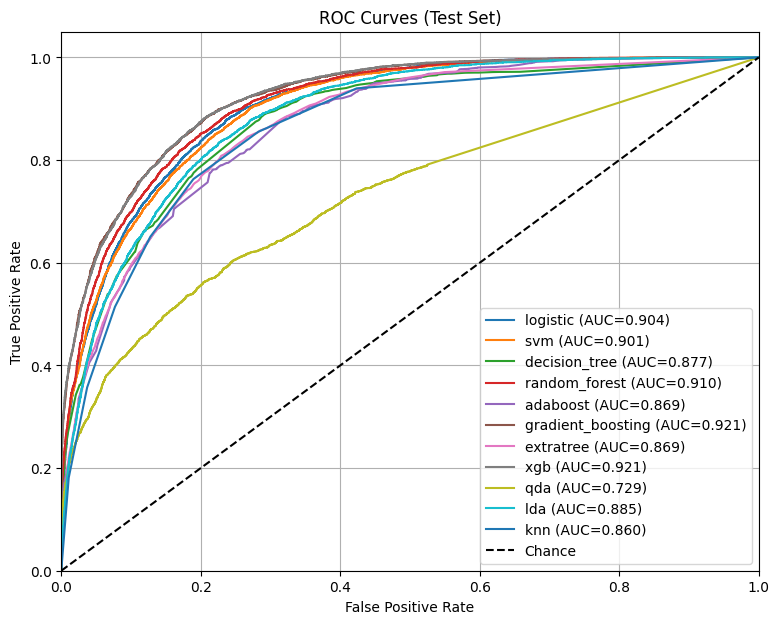

In [36]:
# Plot ROC curves for all models with available scores
plt.figure(figsize=(9, 7))
for name, (fpr, tpr, auc) in roc_curves.items():
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc:.3f})")
plt.plot([0, 1], [0, 1], "k--", label="Chance")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves (Test Set)")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

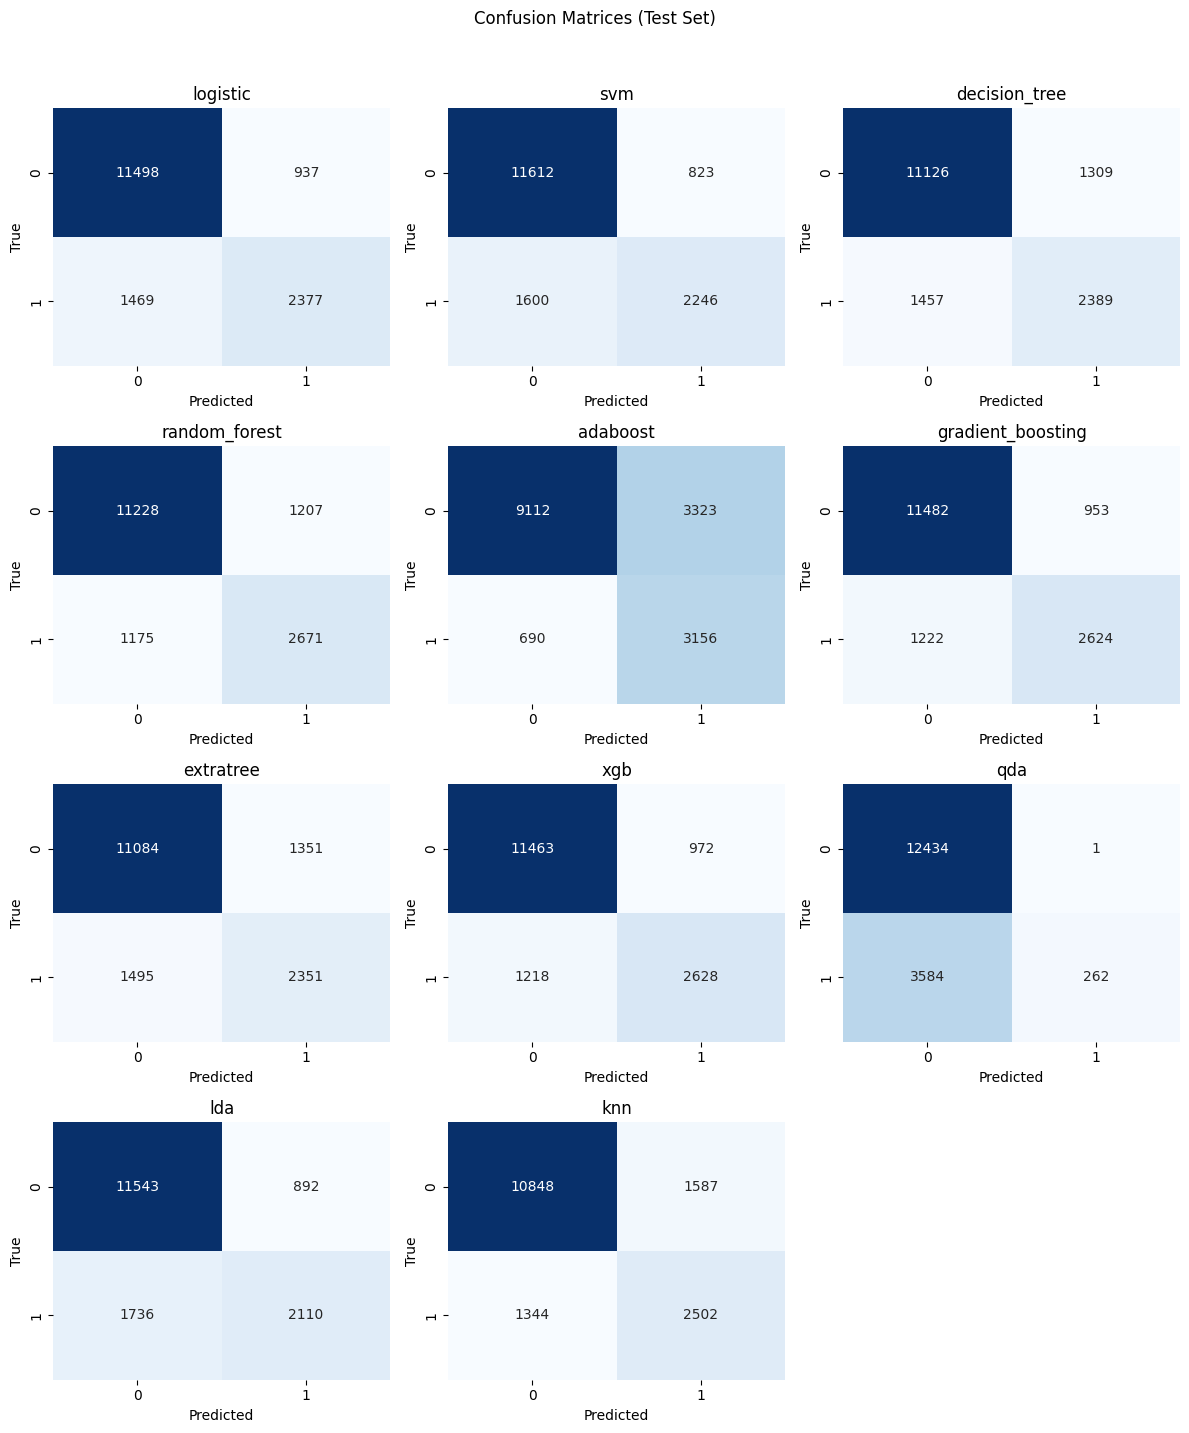

In [37]:
# Plot confusion matrices for each model
n_models = len(trained_models)
n_cols = 3
n_rows = int(np.ceil(n_models / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(4*n_cols, 3.5*n_rows))
axes = np.array(axes).reshape(n_rows, n_cols)
i = 0
for name, model in trained_models.items():
    r, c = divmod(i, n_cols)
    ax = axes[r, c]
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)
    ax.set_title(f"{name}")
    ax.set_xlabel("Predicted")
    ax.set_ylabel("True")
    i += 1

# Hide any unused subplots
for j in range(i, n_rows*n_cols):
    r, c = divmod(j, n_cols)
    fig.delaxes(axes[r, c])

fig.suptitle("Confusion Matrices (Test Set)", y=1.02)
plt.tight_layout()
plt.show()

## 2. Données relationnelles

### Helper Functions

In [9]:
# Load the dataset
def load_relational_dataset(name: str, base_dir: str = "relational_data"):
    """
    Load relational dataset in MATLAB format with keys:
      fea (X: n x d), W (adjacency: n x n), gnd (labels: n)
    """
    path = os.path.join(base_dir, f"{name}.mat")
    mat = loadmat(path)
    # Some MATLAB files store arrays with extra dims; squeeze carefully
    X = np.array(mat.get("fea"))
    W = np.array(mat.get("W"))
    y = np.array(mat.get("gnd")).reshape(-1)
    # Ensure types
    X = X.astype(np.float32)
    W = W.astype(np.float32)
    y = y.astype(np.int64)
    return X, W, y


In [10]:
# Function to compute M
def degree_normalized_smoothing(W: np.ndarray, X: np.ndarray):
    """
    Compute M = D^{-1} W X where D is diagonal of row sums of W.
    If a row-sum is zero, keep it zero to avoid division by zero.
    """
    d = W.sum(axis=1)
    # Avoid division by zero
    d_safe = np.where(d > 0, d, 1.0)
    D_inv = (1.0 / d_safe).reshape(-1, 1)
    # Row-wise scaling of WX
    WX = W @ X
    M = D_inv * WX
    return M

In [34]:
# Building and evaluate the model 

def evaluate_methods(X, y, W, random_state=42, model_set="svm_rf"):
    """
    Build models (keeping original SVM / RF unchanged) and optionally add more.
    Perform 5-fold stratified CV on:
      - Raw X
      - Smoothed M = D^{-1} W X
    Returns DataFrame of accuracy + macro-F1.
    model_set: "svm_rf" (default) or "all"
    """

    svm_pipe = Pipeline([
        ("scaler", StandardScaler(with_mean=False)),
        ("clf", SVC(C=1.0, kernel="linear", random_state=random_state))
    ])
    rf_pipe = Pipeline([
        ("clf", RandomForestClassifier(
            n_estimators=200, max_depth=None, random_state=random_state, n_jobs=-1
        ))
    ])
    models = []
    if model_set in ("svm", "svm_rf", "all"):
        models.append(("SVM-linear", svm_pipe))
    if model_set in ("rf", "svm_rf", "all"):
        models.append(("RandomForest", rf_pipe))

    if model_set == "all":
        models.extend([
            ("LogisticRegression", Pipeline([
                ("scaler", StandardScaler(with_mean=False)),
                ("clf", LogisticRegression(C=0.5, penalty="l2", max_iter=1000, solver="lbfgs", random_state=random_state))
            ])),
            ("KNN", Pipeline([
                ("scaler", StandardScaler(with_mean=False)),
                ("clf", KNeighborsClassifier(n_neighbors=7, weights="distance"))
            ])),
            ("DecisionTree", Pipeline([
                ("clf", DecisionTreeClassifier(max_depth=12, criterion="entropy", random_state=random_state))
            ])),
            ("ExtraTrees", Pipeline([
                ("clf", ExtraTreesClassifier(n_estimators=300, max_depth=None, n_jobs=-1, random_state=random_state))
            ])),
            
            ("LDA", Pipeline([
                ("clf", LinearDiscriminantAnalysis(solver="svd"))
            ])),
            ### ("QDA", Pipeline([
            ###    ("clf", QuadraticDiscriminantAnalysis(reg_param=0.5))
            ### ])),
            """
            ("MLP", Pipeline([
                ("scaler", StandardScaler(with_mean=False)),
                ("clf", MLPClassifier(hidden_layer_sizes=(256,), activation="relu",
                                      alpha=1e-4, learning_rate_init=0.001,
                                      max_iter=200, random_state=random_state))
            ])),
            """
        ])

    # Build smoothed representation
    M = degree_normalized_smoothing(W, X)

    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)
    rows = []
    for rep_name, Xrep in [("X", X), ("M = D^{-1} W X", M)]:
        for model_name, pipe in models:
            print(f'Training {model_name}')
            acc = cross_val_score(pipe, Xrep, y, cv=skf, scoring="accuracy", n_jobs=-1).mean()
            f1 = cross_val_score(pipe, Xrep, y, cv=skf, scoring="f1_macro", n_jobs=-1).mean()
            rows.append({
                "representation": rep_name,
                "model": model_name,
                "accuracy_mean_5cv": acc,
                "macro_f1_mean_5cv": f1
            })
    df = pd.DataFrame(rows).sort_values(["representation", "model"]).reset_index(drop=True)
    return df


In [ ]:
# Running the pipeline in Citeseer dataset
dataset_name = "citeseer"  
X, W, y = load_relational_dataset(dataset_name, base_dir="relational_data")

# Evaluate all models
results_all = evaluate_methods(X, y, W, random_state=42, model_set="all")
print("\n=== Model Set Evaluation ===")
print(results_all.to_string(index=False))

In [ ]:
# Running the pipeline in pubmed dataset
dataset_name = "pubmed" 
X, W, y = load_relational_dataset(dataset_name, base_dir="relational_data")

# Evaluate all models
results_all = evaluate_methods(X, y, W, random_state=42, model_set="all")
print("\n=== Model Set ===")
print(results_all.to_string(index=False))

In [22]:
# Running the pipeline in Cora dataset
dataset_name = "cora"  
X, W, y = load_relational_dataset(dataset_name, base_dir="relational_data")

# Evaluate all models
results_all = evaluate_methods(X, y, W, random_state=42, model_set="all")
print("\n=== Model Set evaluation ===")
print(results_all.to_string(index=False))

/home/abdelhak/miniconda3/envs/ds/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/abdelhak/miniconda3/envs/ds/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/abdelhak/miniconda3/envs/ds/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/home/abdelhak/miniconda3/envs/ds/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of p


=== Extended Model Set ===
representation              model  accuracy_mean_5cv  macro_f1_mean_5cv
M = D^{-1} W X           AdaBoost           0.501469           0.342614
M = D^{-1} W X       DecisionTree           0.709381           0.697358
M = D^{-1} W X         ExtraTrees           0.839369           0.832225
M = D^{-1} W X   GradientBoosting           0.813509           0.803401
M = D^{-1} W X                KNN           0.759968           0.751507
M = D^{-1} W X                LDA           0.721939           0.707489
M = D^{-1} W X LogisticRegression           0.796534           0.784550
M = D^{-1} W X                MLP           0.812781           0.801887
M = D^{-1} W X                QDA           0.329734           0.370635
M = D^{-1} W X       RandomForest           0.825703           0.817312
M = D^{-1} W X         SVM-linear           0.778075           0.770958
             X           AdaBoost           0.449029           0.310787
             X       DecisionTree   